# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MDS 2030 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

# Tarea 3: Análisis exploratorio de datos.

***
## Instrucciones Generales.
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- El Notebook debe estrar estructurado en forma ordenado, seguir buenas prácticas de escritura y programación, e incluir comentarios o celdas de markdown suficientes para explicar claramente todos los códigos computacionales.
- Para cada pregunta, incluya un breve **análisis de los gráficos y/o resúmentes estadísticos generados**, de manera de responder a las preguntas planteadas.

***
## Introducción.


Continuando con el caso de estudio desarrollado en las Tareas 1 y 2, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

En la **Tarea 1**, ud. avanzó en la primera etapa de construcción de la base de datos, utilizando web scraping para extraer los datos de ofertas de empleo en *data science* publicados en la red Linkedin, para una ciudad o país. Este proceso fue repetido y ampliado para todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  

Para considerar en el análisis el contexto económico y tecnológico de cada país, entre los datos se incluirán también otras variables como el *Índice global de innovación* (https://www.globalinnovationindex.org/Home), disponible online para distintos países del mundo.

En la **Tarea 2**, ud. realizó el proceso de integración, limpieza y procesamiento de las bases de datos obtenidas mediante webscraping, generando así un conjunto de datos apto para distintos tipos de análisis.

Para esta **Tarea 3**, se ha enriquecido la base de datos generada en la Tarea 2, incorporando variables relativas a: salarios ofrecidos para cada puesto de trabajo, años de experiencia y nivel de educación exigidos, y un score de ambiente laboral de cada empresa ofertante. Esta es la base de datos final a utilizar para el análisis y modelamiento de datos.

El objetivo de esta Tarea, es realizar un análisis exploratorio de los datos, comprender las relaciones o tendencias entre distintas variables, y obtener conclusiones útiles que permitan esbozar un modelo predictivo de los salarios de cientistas de datos como función de su país, formación y experiencia profesional, y/o indicadores de la compañía.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea3/datos_t3.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: tres años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.

**Nota**: estos datos han sido parcialmente simulados para efectos de este ejercicio, no los utilice para ninguna toma de decisión real.



### 1. ¿Cómo se distribuyen los datos de empleos por país?  

Genere un gráfico de barras o resumen estadístico que muestre claramente esta distribución. Además comente, ¿Están balanceados los datos, o puede identificar algún(os) países para los cuales los datos sean poco representativos?

*Funciones útiles:* `sns.countplot()`,`pd.groupby()`,`pd.pivot_table()`.

### Respuesta
Procedemos en primer lugar a cargar nuestro dataset. Luego, guardamos las columnas, sus correlaciones y estadisticos.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

bolivia_bolivia_bolivia_bolivia_df = pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/tarea3/datos_t3.csv', sep=';')
df.head()

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037


In [10]:
columns = df.columns
columns

Index(['Country', 'Location', 'Title', 'Company', 'Url', 'CountryScore',
       'English', 'EducationLevel', 'YearsExperience', 'CompanyScore',
       'SalaryUSD'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1000 non-null   object 
 1   Location         1000 non-null   object 
 2   Title            1000 non-null   object 
 3   Company          1000 non-null   object 
 4   Url              1000 non-null   object 
 5   CountryScore     515 non-null    float64
 6   English          1000 non-null   int64  
 7   EducationLevel   1000 non-null   int64  
 8   YearsExperience  1000 non-null   int64  
 9   CompanyScore     1000 non-null   float64
 10  SalaryUSD        1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [12]:
corr_df = df.corr()
corr_df

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_28915/690140719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
CountryScore,1.000000,0.051570,-0.024536,0.002981,-0.024695,0.557048
English,0.051570,1.000000,0.023973,0.013237,-0.014334,0.076612
EducationLevel,-0.024536,0.023973,1.000000,0.704666,0.020712,0.099817
YearsExperience,0.002981,0.013237,0.704666,1.000000,0.008798,0.084613
CompanyScore,-0.024695,-0.014334,0.020712,0.008798,1.000000,0.032178
SalaryUSD,0.557048,0.076612,0.099817,0.084613,0.032178,1.000000


In [13]:
describe_df = df.describe()
describe_df

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
count,515.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,26.896117,0.519000,2.973000,6.985000,5.070424,1722.12300
std,4.617231,0.499889,1.086946,1.480191,2.037362,2935.96947
min,20.300000,0.000000,0.000000,2.000000,-1.513845,42.00000
25%,22.600000,0.000000,2.000000,6.000000,3.707573,933.00000
50%,28.600000,1.000000,3.000000,7.000000,5.093822,1475.00000
75%,29.200000,1.000000,4.000000,8.000000,6.424400,2134.00000
max,34.000000,1.000000,6.000000,11.000000,12.105570,78600.00000


Graficamos la distribución de empleos por país

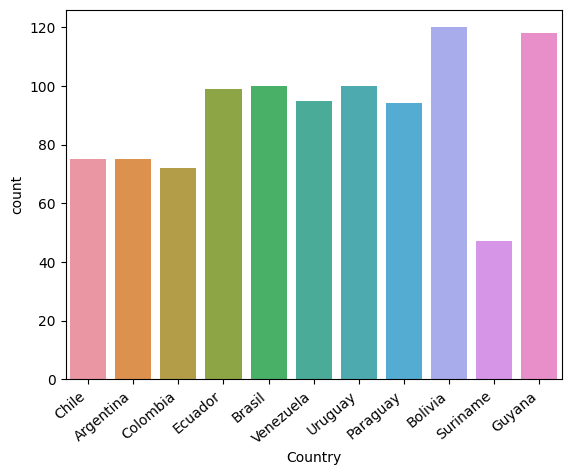

In [163]:
ax = sns.countplot(df, x='Country')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### 2. Estudie la distribución de salarios en el dataset, y analice la existencia de datos anómalos. 

**a)** Genere un histograma para la variable *SalaryUSD*, incluyendo una curva de densidad de probabilidad (kde).<br>
**b)** ¿Puede identificar valores fuera de rango o anómalos? ¿Por qué son anómalos, y a qué países corresponden?<br>
**c)** ¿Qué tratamiento daría ud. a esos datos anómalos? (Ej: nada, eliminar, corregir, etc.) Justifique e implemente su propuesta. <br>

*Funciones útiles:* `sns.histplot()`, `pd.describe()`.

### a) Graficamos la variable y su curva de densidad de probabilidad

Observamos los maximos y minimos del salario.

In [62]:
df['SalaryUSD'].max()

78600

In [63]:
df['SalaryUSD'].min()

42

Obtenemos una descripción de la distribución de dichos datos.

count     1000.00000
mean      1722.12300
std       2935.96947
min         42.00000
25%        933.00000
50%       1475.00000
75%       2134.00000
max      78600.00000
Name: SalaryUSD, dtype: float64


<Axes: ylabel='SalaryUSD'>

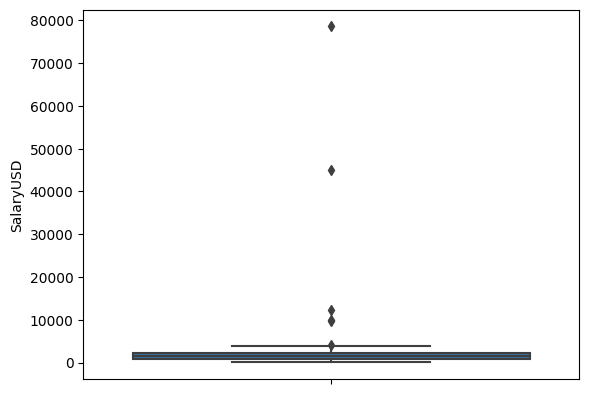

In [68]:
salary_stats = df['SalaryUSD'].describe()
print(salary_stats)
sns.boxplot(df, y='SalaryUSD')

<Axes: xlabel='SalaryUSD', ylabel='Count'>

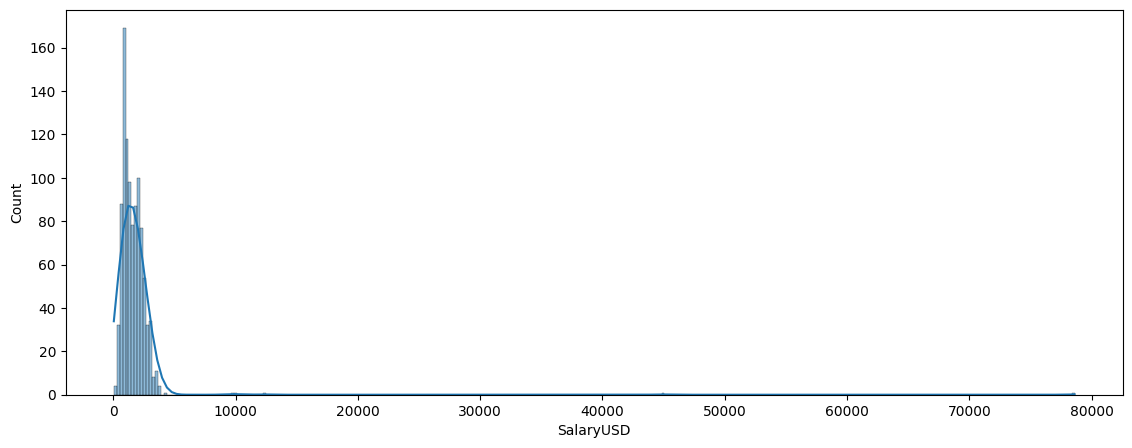

In [61]:
fig=plt.figure(figsize=(30,5))
ax1=fig.add_subplot(121)

sns.histplot(df, x='SalaryUSD', ax=ax1, kde=True)

### b) Explicación
Se pueden identificar valores fuera de rango o anómalos. En particular, desde el promedio más una desviación estándar en adelante hay unos pocos datos con salarios muy por sobre la media, lo cual distorsiona la distribución de salarios. Estos datos, aproximadamente un 0,5 % del total de datos (1000) son sueldos significativamente mayores que el promedio y tienen un valor muy alejado de los estadísticos del boxplot, por lo cual se podrían dejar afuera ya que, al ser menos de un 5% de la muestra, pierden relevancia estadística.

Para identificarlos, filtramos nuestro dataset con aquellos sueldos que sean mayor al promedio mas una desviación estándar, lo cual es bastante utilizado en estadística.

In [76]:
df[df['SalaryUSD'] > salary_stats['mean'] + salary_stats['std']]

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
835,Suriname,"Centrum, Paramaribo, Suriname",Database Reliability Engineer (Remote),Percona,https://sr.linkedin.com/jobs/view/database-rel...,NaN,1,3,6,7.340831,78600
838,Suriname,"Centrum, Paramaribo, Suriname",Frontend Developer (Angular),Kingfisher Recruitment,https://sr.linkedin.com/jobs/view/frontend-dev...,NaN,1,4,8,8.187684,9801
844,Suriname,"Centrum, Paramaribo, Suriname",Back-end Developer,Kingfisher Recruitment,https://sr.linkedin.com/jobs/view/back-end-dev...,NaN,1,4,8,6.665769,9870
940,Guyana,Guyana,Sr. Platform Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-platform-...,NaN,0,1,5,4.971855,44900
953,Guyana,"No. 3, Mahaica-Berbice, Guyana",Sr. Software Engineer,Univision,https://gy.linkedin.com/jobs/view/sr-software-...,NaN,0,5,10,7.120389,12340


Vemos que hay 5 datos de empleos con sueldos outlier, de los cuales 3 son de Suriname y 2 de Guyana.

### c) Explicación
Dado que dichos datos representan un 0.5% del total de datos, poseen muy poca relevancia para el modelo el considerarlos y por ende se pueden eliminar. Además, no se tiene mucha información como para poder indagar si el dato de sueldo es fidedigno, o bien, si hay otros factores a considerar para estandarizar el dato de sueldo.

Procedemos a eliminar dichos datos.

In [77]:
df = df[df['SalaryUSD'] <= salary_stats['mean'] + salary_stats['std']]
df

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
995,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
996,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
997,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
998,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


<Axes: xlabel='SalaryUSD', ylabel='Count'>

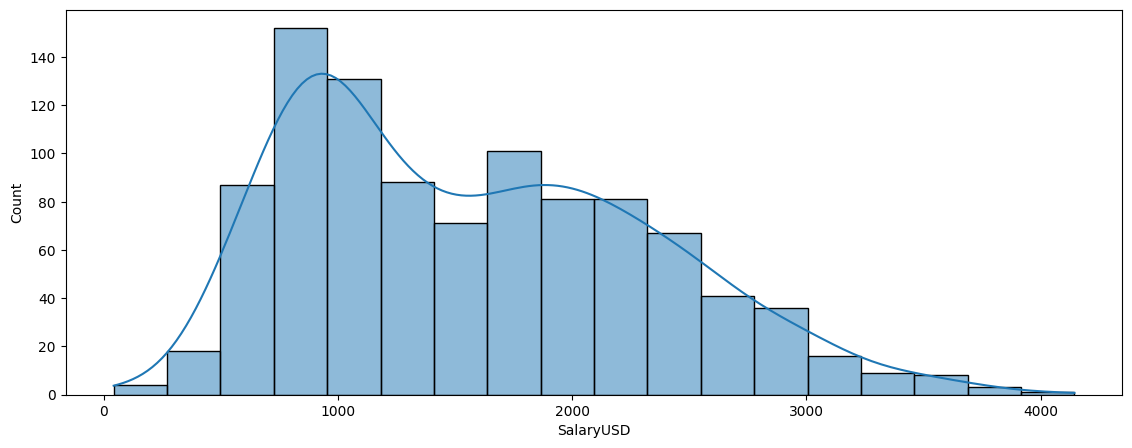

In [79]:
fig=plt.figure(figsize=(30,5))
ax1=fig.add_subplot(121)
sns.histplot(df, x='SalaryUSD', ax=ax1, kde=True)

Ahora vemos una distribución de sueldos bastante mas cercana a la realidad.

### 3. ¿Cómo se comparan en general los salarios promedio de Cientistas de Datos por país? 

Genere un gráfico de cajas que muestre la media y dispersión de los salarios para cada país y analice. 
¿Cuáles son los países con mayores y menores salarios medios?

*Funciones útiles:* `sns.boxplot()`

Generamos un boxplot por país.

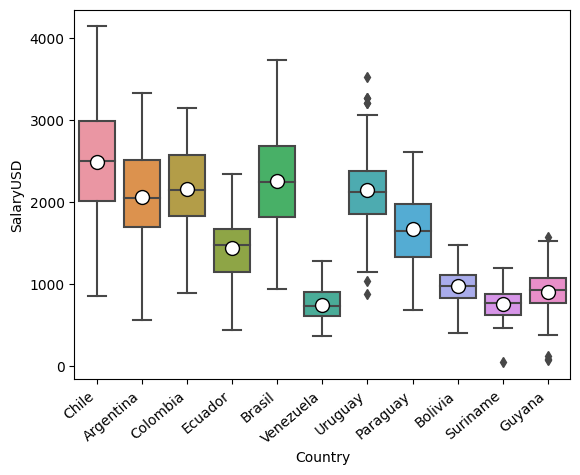

In [111]:
ax = sns.boxplot(df, x='Country', y='SalaryUSD', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, )

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [97]:
salary_country = dict()
for c in df['Country'].unique():
    salary_country[c] = df[df['Country'] == c]['SalaryUSD'].mean()

sorted(salary_country, key=lambda x: salary_country[x], reverse=True)

['Chile',
 'Brasil',
 'Colombia',
 'Uruguay',
 'Argentina',
 'Paraguay',
 'Ecuador',
 'Bolivia',
 'Guyana',
 'Suriname',
 'Venezuela']

**Salarios medios más altos, en orden decreciente**: Chile, Brasil, Colombia

**Salarios medios más bajos, en orden creciente**: Venezuela, Suriname, Guyana

### 4. ¿Influye el manejo del idioma inglés en los salarios? ¿Influye (o no) de la misma manera para todos los países?

Genere un **resumen estadístico y un gráfico** que le permitan responder fundadamente esta pregunta, y argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

Generamos el resumen estadístico del idioma inglés versus los salarios. También graficamos un boxplot.

In [107]:
# Estadísticos del salario con empleo sin requerir inglés
df[df['English'] == 0]['SalaryUSD'].describe()

count     479.000000
mean     1375.311065
std       649.486432
min        42.000000
25%       808.000000
50%      1295.000000
75%      1866.000000
max      3264.000000
Name: SalaryUSD, dtype: float64

In [108]:
# Estadísticos del salario con empleo requiriendo inglés
df[df['English'] == 1]['SalaryUSD'].describe()

count     516.000000
mean     1759.375969
std       803.389433
min        81.000000
25%      1031.000000
50%      1718.000000
75%      2373.000000
max      4144.000000
Name: SalaryUSD, dtype: float64

Ahora graficamos boxplots en torno al salario, dependiendo del nivel de inglés.

<Axes: xlabel='English', ylabel='SalaryUSD'>

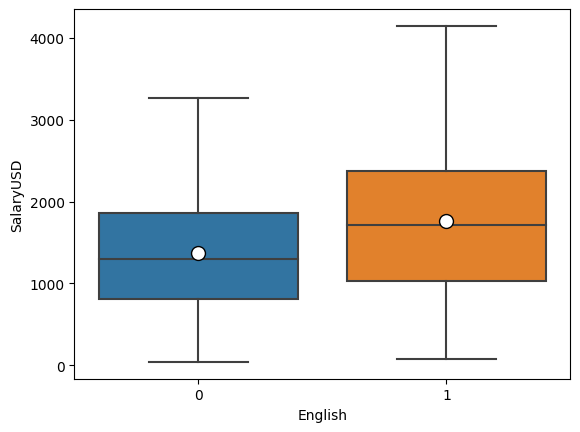

In [121]:
sns.boxplot(df, x='English', y='SalaryUSD', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, )

Se puede ver claramente que en cada uno de los estadísticos, cuando en el empleo se requiere nivel de inglés, el estadístico es mayor. Dado lo anterior, se puede ver una amplia tendencia a que el salario aumente si el idioma inglés es un requisito.

Ahora procedemos a desglosar esto por país.

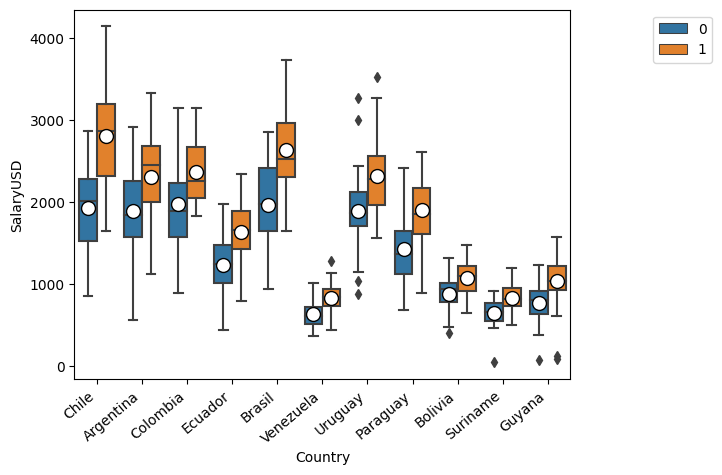

In [122]:
ax = sns.boxplot(df, x='Country', y='SalaryUSD', hue='English', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, )

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(bbox_to_anchor= (1.3,1))
plt.show()

Podemos ver que en cada pais se tiende a cumplir la misma tendencia: empleos con requisito de inglés tienden a tener mejor salario. Podemos ver algunos casos notables como **Chile** en que el percentil 25 de sueldo en empleo con inglés llega a ser mayor que el percentil 75 de empleo sin inglés, lo cual da cuenta de una diferencia muy notoria en sueldos en tal país, para cuando se requiere inglés versus cuando no. Se podría interpretar que en Chile una persona que maneja el nivel de inglés para un empleo es muy valorado.

### 5. Analice los  años de experiencia y nivel educacional requeridos en los distintos países de sudamérica. ¿Son similares, o puede detectar alguna diferencia significativa para alguno(s)? 

Genere una **tabla resumen y gráficos** con los promedios de las variables *EducationLevel* y *YearsExperience* por país, y en base a ellos argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

Primero agrupamos por promedio de años de experiencia y nivel educacional, para cada pais.

In [139]:
mean_country_df = df[['Country', 'YearsExperience', 'EducationLevel']].groupby('Country').mean().reset_index()
mean_country_df

,Country,YearsExperience,EducationLevel
0,Argentina,7.040000,3.013333
1,Bolivia,6.908333,2.983333
2,Brasil,7.130000,3.070000
3,Chile,6.826667,2.786667
4,Colombia,7.097222,3.041667
5,Ecuador,6.878788,2.848485
6,Guyana,7.186441,2.974576
7,Paraguay,6.936170,3.117021
8,Suriname,6.936170,3.042553
9,Uruguay,6.900000,2.950000


Creamos un boxplot que indique los años de experiencia y nivel educacional promedio, por país.

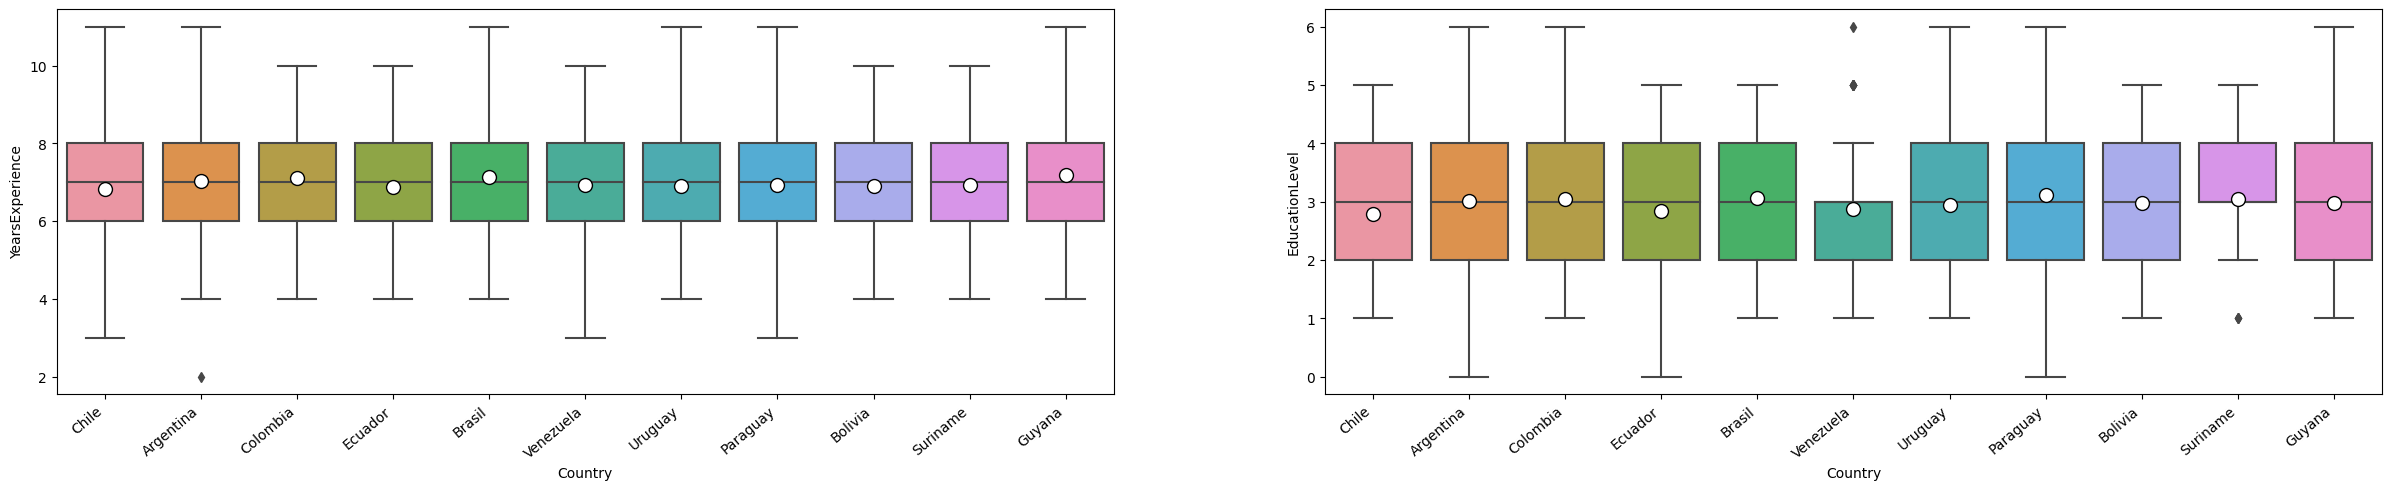

In [144]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1_box = sns.boxplot(df, x='Country', y='YearsExperience', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax1)

ax1_box.set_xticklabels(ax1_box.get_xticklabels(), rotation=40, ha="right")

ax2_box = sns.boxplot(df, x='Country', y='EducationLevel', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax2)

ax2_box.set_xticklabels(ax2_box.get_xticklabels(), rotation=40, ha="right")

plt.show()

Del gráfico 1 sobre Años de experiencia, podemos ver que en general el promedio de años de experiencia requeridos es bastante similar en cada país de Sudamérica, los cuales son en torno a 7 años en promedio aproximadamente. Asimismo, podemos notar que en países como Colombia, Ecuador, Bolivia o Suriname, los datos de años de experiencia son más heterogéneos en general que los otros países. Mientras que en países como Chile o Paraguay los datos de años de experiencia tienen mayor dispersión.

Del gráfico 1 sobre Nivel Educacional podemos ver que los promedios de nivel educacional rondan alrededor de 3, teniendo un poco más de dispersión que los promedios de años de experiencia laboral requeridos. Sin embargo, las distribuciones de nivel educacional en el caso de Venezuela y Suriname son muy diferentes a los demás países, siendo estos dos casos opuestos al mismo tiempo. Podemos ver que en Venezuela, la mediana de los datos es prácticamente la misma que el percentil 75 y el promedio, por lo que pareciera ser que en muy pocos casos el nivel educacional pedido es mayor a 3. Por el contrario, podemos que en Suriname, la mediana es igual al percentil 25, por lo que en muy pocos casos el nivel educacional exigido es menor a 3.

### 6. Calcule y grafique la matriz de correlación para las variables numéricas del dataset. 

Analice los coeficientes de correlación entre *SalaryUSD* y otras variables del dataset. ¿Cuáles variables identifica como más correlacionadas, o más relevantes para construir un modelo predictivo de salarios?

*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`

Calculamos la matriz de correlación del dataset y graficamos con un mapa de calor. Vale la pena comentar que las variables categóricas son excluidas automáticamente al momento de ejecutar el comando.

In [146]:
corr_df = bolivia_bolivia_bolivia_df.corr(numeric_only=True)
corr_df

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
CountryScore,1.000000,0.051570,-0.024536,0.002981,-0.024695,0.557048
English,0.051570,1.000000,0.022330,0.013362,-0.016729,0.253391
EducationLevel,-0.024536,0.022330,1.000000,0.702734,0.016637,0.444006
YearsExperience,0.002981,0.013362,0.702734,1.000000,0.005866,0.431057
CompanyScore,-0.024695,-0.016729,0.016637,0.005866,1.000000,-0.025597
SalaryUSD,0.557048,0.253391,0.444006,0.431057,-0.025597,1.000000


<Axes: >

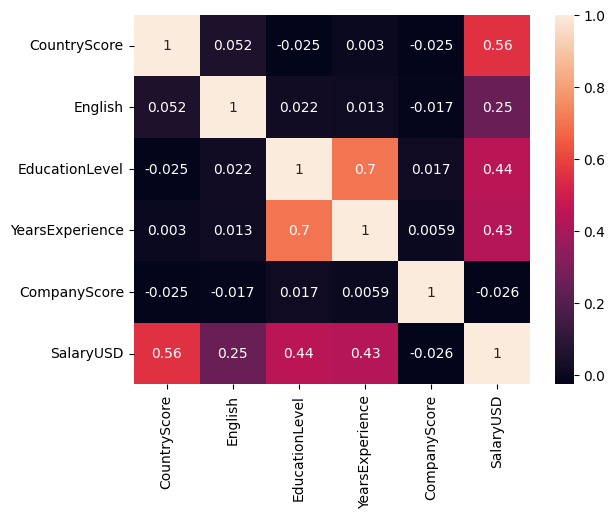

In [150]:
sns.heatmap(corr_df, annot=True)

Filtramos por salario para observar la correlación de cada variable con el salario.

In [148]:
corr_df[['SalaryUSD']]

,SalaryUSD
CountryScore,0.557048
English,0.253391
EducationLevel,0.444006
YearsExperience,0.431057
CompanyScore,-0.025597
SalaryUSD,1.000000


<Axes: >

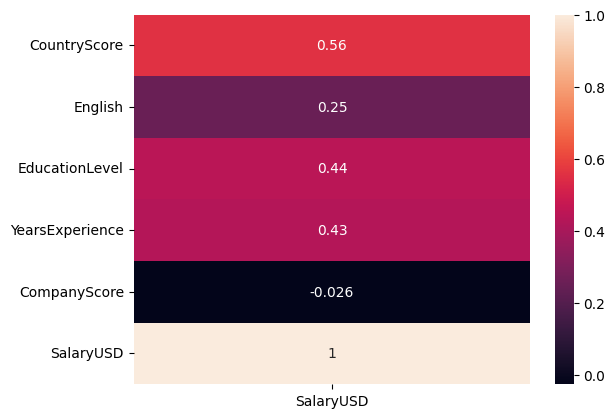

In [151]:
sns.heatmap(corr_df[['SalaryUSD']], annot=True)

En cualquiera de los gráficos podemos observar lo siguiente: la correlacion entre variables diferentes, sin considerar salario, es insignificante, ya que es muy cercana a 0. Por otra parte, si filtramos solo las correlaciones entre las variables numéricas contra el salario, vemos que surgen correlaciones más considerables, salvo el caso de la correlación entre CompanyScore y Salario. El caso más notable es el de CountryScore y Salario, cuya correlación es 0.56. Podemos decir entonces que el índice de innovación de un país tiene una correlación considerable con el salario de los empleos ofrecidos. Por otra parte, las variables de Requisito de Inglés, Nivel de formación profesional y años de experiencia tienen correlaciones mayor a 0.2 con salario, por lo que si podrían explicar en parte el salario de un empleo ofrecido y deberían ser consideradas en un modelo de predicción.

### 7. Construya gráficos de dispersión entre salarios y las demás variables. 

**a)** Genere un conjunto de gráficos de dispersión entre `SalaryUSD` y las demás variables, diferenciando por país.(Hint: Revise cuidadosamente la documentación y parámetros de la función `sns.pairplot()`). <br>
**b)** Analice los gráficos y comente, 
* ¿qué correlaciones puede identificar? 
* ¿varían estas correlaciones por país? 
* ¿son coherentes las conclusiones obtenidas a partir de los gráficos, con la matriz de correlación calculada en el punto 5?

*Funciones útiles:* `sns.pairplt()`

**a)** Para cada país, calculamos la dispersión entre cada variable y el salario.

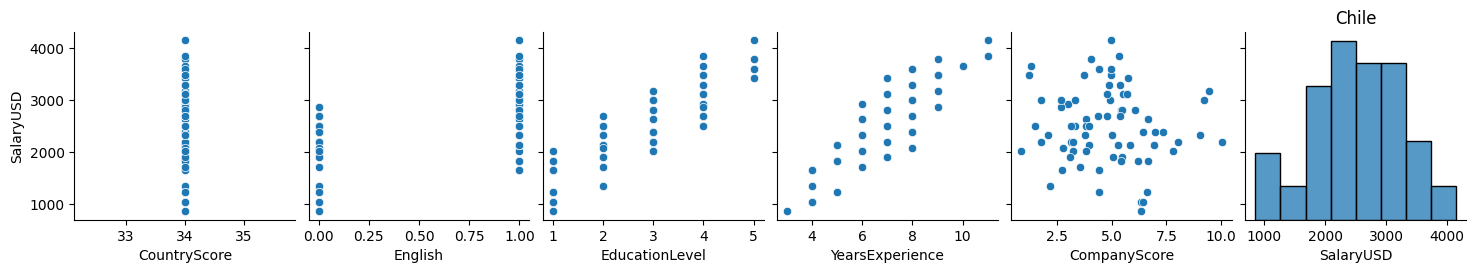

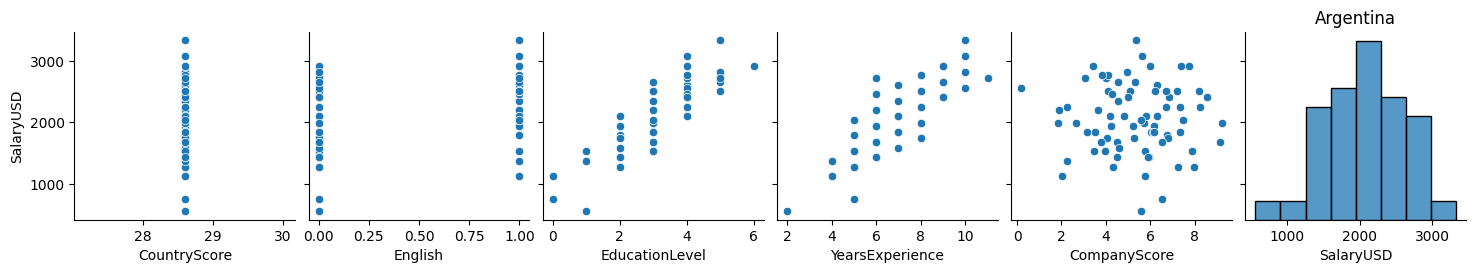

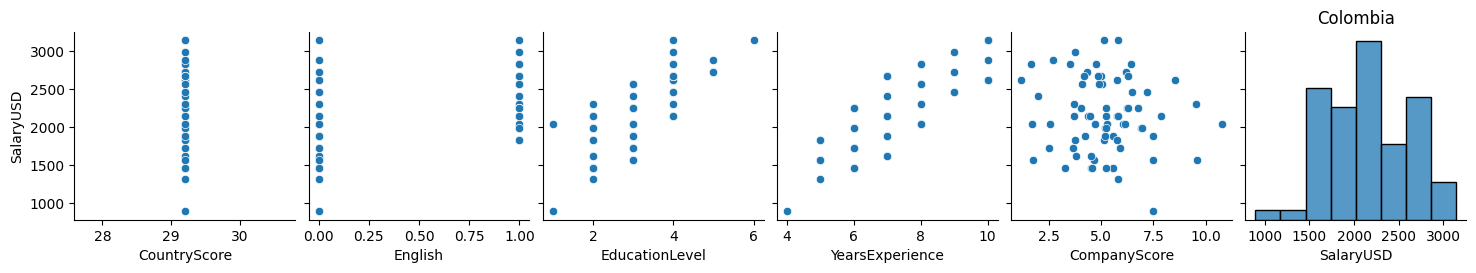

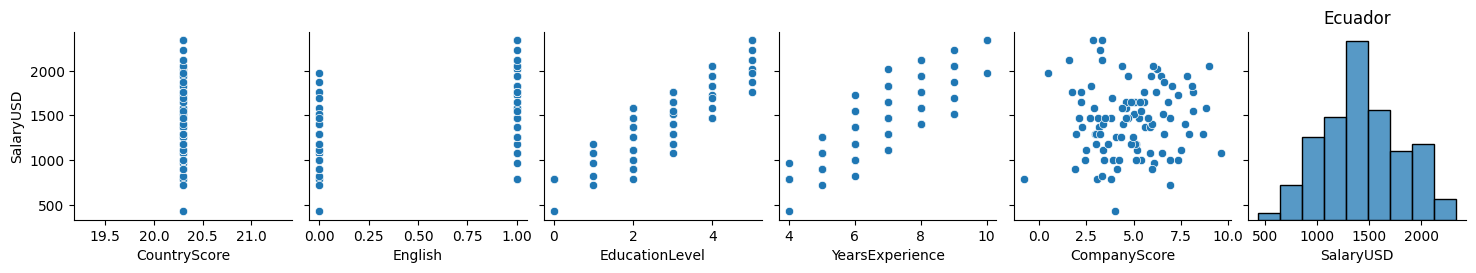

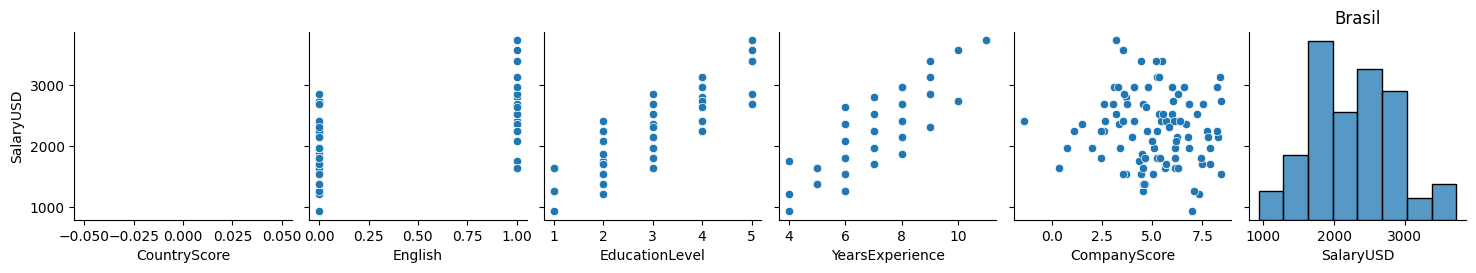

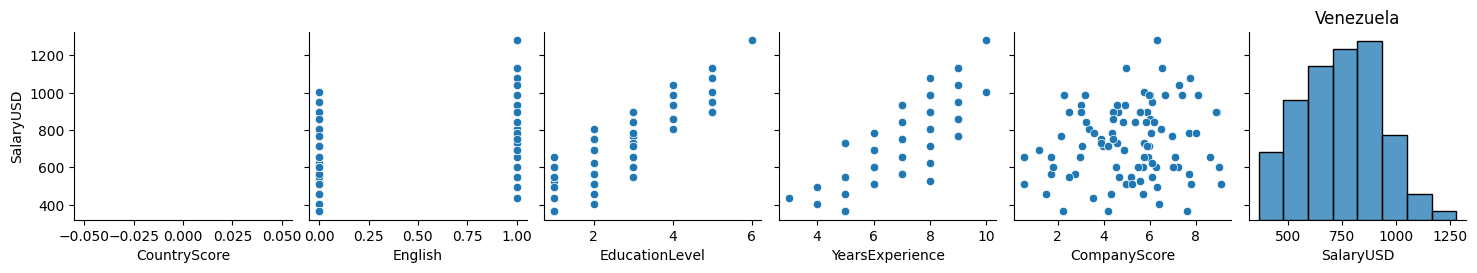

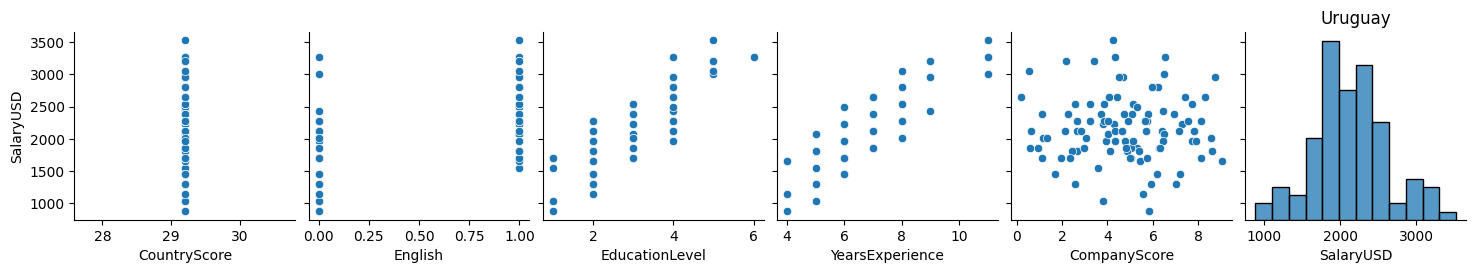

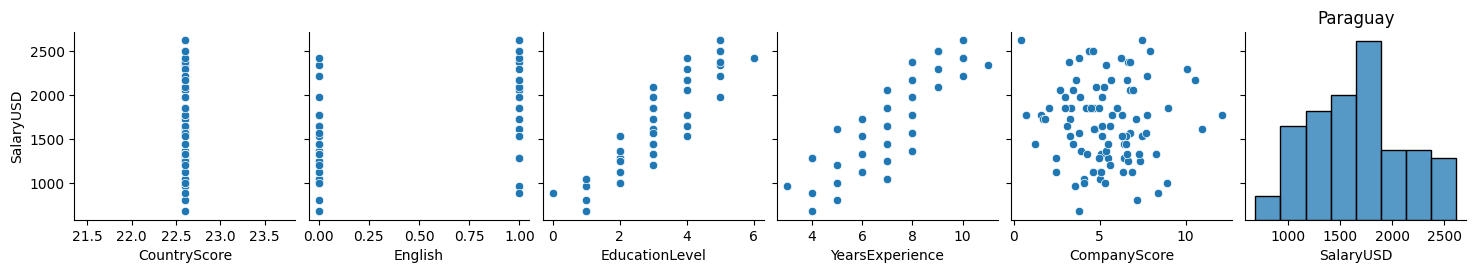

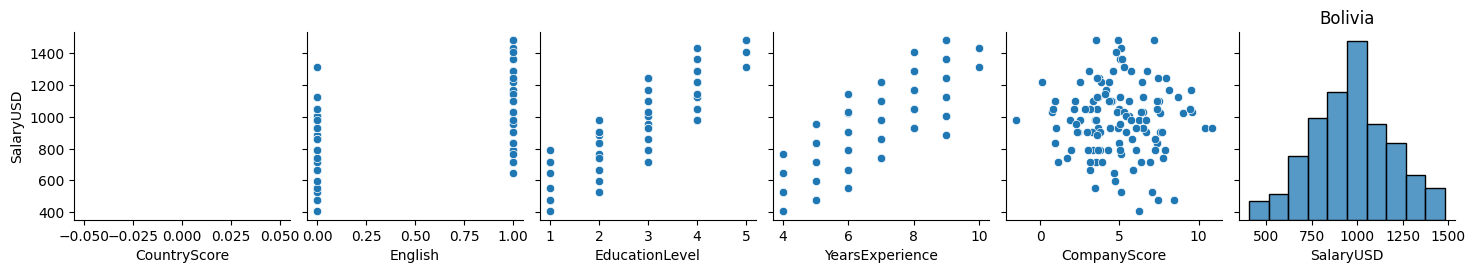

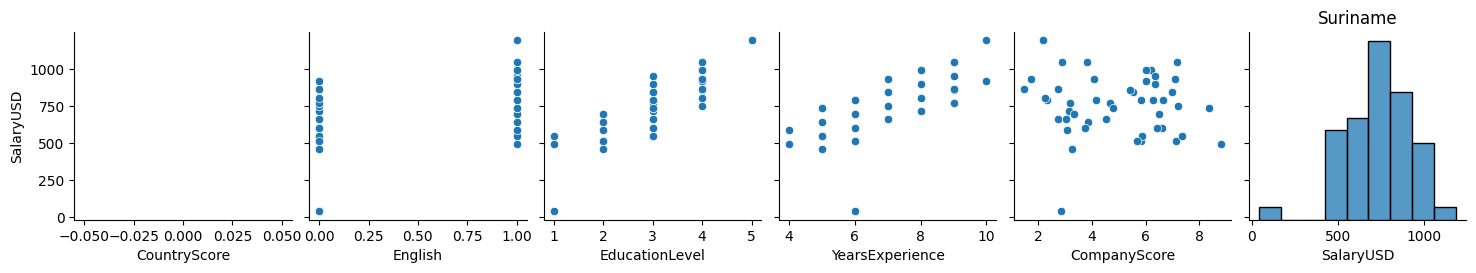

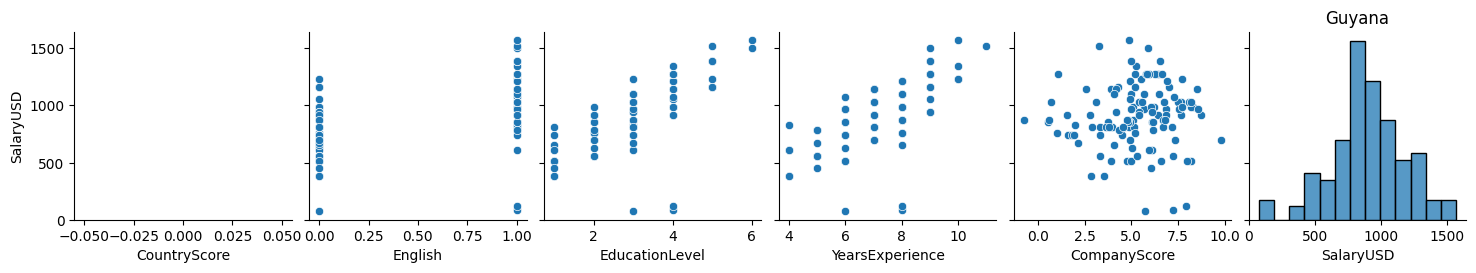

In [159]:
countries = df['Country'].unique().tolist()
for c in countries:
    sns.pairplot(df[df['Country'] == c],y_vars='SalaryUSD')
    plt.title(c)

Para el caso de *CountryScore*, se puede ver que no tiene mucha importancia verlo desagregado por país, dado que es un dato único por país, por lo que se puede ver más a nivel general en términos del salario.

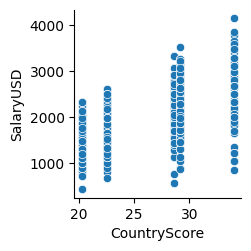

In [160]:
sns.pairplot(df, y_vars='SalaryUSD', x_vars='CountryScore')
    

**b.1)** Se pueden identificar correlaciones en cada país por *English*, *EducationLevel*, *YearsExperience* y *CountryScore*, pero esta última a nivel agregado.

**b.2)** Visualmente, en general en todos los países se ven correlaciones similares. 

**b.3)** Sí son coherentes los resultados gráficos versus los vistos en el mapa de calor de correlaciones. De hecho gracias a los gráficos, se puede explicar que la correlación de *English* y *SalaryUSD* es un poco menor (=0.25) debido a que en *English* en realidad solo hay dos posibles valores, lo cual genera mucho error al momento de trazar una hipotética regresión lineal que minimice los cuadrados entre los datos.

### 8. Analice la correlación entre variables para un país en particular.

**a)** Seleccione los registros del Dataframe correspondientes a un país a su elección, y calcule nuevamente la matriz de correlación para este subconjunto de los datos. <br>
**b)** Analice: ¿Cómo varían sus resultados respecto a la matriz de confusión calculada con todos los datos en el punto 5? ¿Qué conclusión puede obtener a partir de esta comparación, que sea de utilidad para la construcción de un modelo predictivo de salarios?

*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`

**a)** Seleccionamos el país **Bolivia** para efectos de este ejercicio dado que es el país con más datos.

In [171]:
bolivia_df = df[df['Country'] == 'Bolivia']
bolivia_df

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
710,Bolivia,"Cochabamba, Bolivia",Mid/Sr Data Scientist (5571),Encora Inc.,https://bo.linkedin.com/jobs/view/mid-sr-data-...,NaN,1,3,6,6.509014,1028
711,Bolivia,Bolivia,Data Scientist - Remote - Latin America,FullStack Labs,https://bo.linkedin.com/jobs/view/data-scienti...,NaN,0,2,7,1.704333,741
712,Bolivia,"Santa Cruz de la Sierra, Santa Cruz, Bolivia",Work From Home Python Developer,L.A. Head Hunter,https://bo.linkedin.com/jobs/view/work-from-ho...,NaN,1,1,6,3.340406,789
713,Bolivia,"Santa Cruz, Bolivia",Data Scientist - Remote - Latin America,FullStack Labs,https://bo.linkedin.com/jobs/view/data-scienti...,NaN,0,4,9,3.653651,1123
714,Bolivia,Bolivia,Remote Automation QA Engineer,Scopic Software,https://bo.linkedin.com/jobs/view/remote-autom...,NaN,1,4,7,6.444799,1219
...,...,...,...,...,...,...,...,...,...,...,...
825,Bolivia,Bolivia,Principal Statistical Programmer,DOCS,https://bo.linkedin.com/jobs/view/principal-st...,NaN,1,2,5,0.968949,836
826,Bolivia,Bolivia,Principal Statistical Programmer,DOCS,https://bo.linkedin.com/jobs/view/principal-st...,NaN,1,4,6,4.108965,1147
827,Bolivia,Bolivia,Remote Java Developer,Scopic Software,https://bo.linkedin.com/jobs/view/remote-java-...,NaN,1,3,7,0.916504,1099
828,Bolivia,"Cochabamba, Bolivia",Encora Challenge: Measure Your Skills,Encora Inc.,https://bo.linkedin.com/jobs/view/encora-chall...,NaN,0,4,8,9.451788,1051


Calculamos la correlacion. Es importante considerar, dado los gráficos del punto 7, que en Bolivia no hay datos de *CountryScore*, por lo que eliminamos dicha columna del análisis.

In [173]:
bolivia_df.drop('CountryScore', axis=1, inplace=True)

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_28915/1884930489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bolivia_df.drop('CountryScore', axis=1, inplace=True)


In [174]:
corr_bolivia_df = bolivia_df.corr(numeric_only=True)
corr_bolivia_df

,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
English,1.000000,-0.083826,-0.095670,-0.064264,0.445180
EducationLevel,-0.083826,1.000000,0.685391,-0.014549,0.791910
YearsExperience,-0.095670,0.685391,1.000000,0.046018,0.763515
CompanyScore,-0.064264,-0.014549,0.046018,1.000000,-0.021035
SalaryUSD,0.445180,0.791910,0.763515,-0.021035,1.000000


<Axes: >

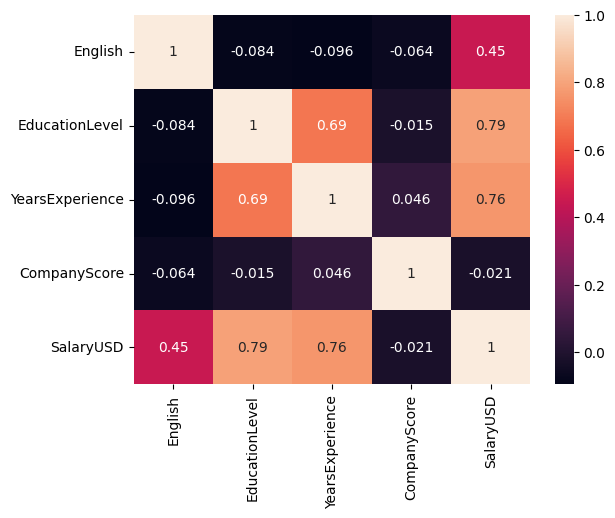

In [177]:
sns.heatmap(corr_bolivia_df, annot=True)

**b)** Comparando los resultados con la matriz calculada en el punto 6, las correlaciones son considerablemente mayores en las variables contra la variable de salarios, teniendo valores de correlación *English-SalaryUSD* 0.45, *EducationLevel-SalaryUSD* 0.79, *YearsExperience-SalaryUSD* 0.76, mayores a los datos anteriores (0.25, 0.44, 0.43, respectivamente). 

Podríamos argumentar y concluir que, al tener datos en este caso de un solo país, agregamos menos variabilidad que podría no ser explicada por las variables que actualmente tenemos en nuestro dataset, por lo que las correlaciones tienden a ser mayores y el R2 sería mayor. Si, por el contrario, agregamos por todos los países, podríamos estar omitiendo capacidad predictiva al introducir la variabilidad de todos los países y condensándola en las pocas columnas que tenemos. Cada país tiene factores propios que podrían tener relevancia estadística sobre la distribución de sueldo, por ejemplo indicadores económicos del país, y por lo tanto, si fuéramos a realizar la predicción sobre un salario de un país específico con un modelo entrenado sobre todos los países, estaríamos introduciendo sesgos en el cálculo de la predicción del sueldo en tal país, al considerar información que semánticamente no tiene mucho que ver con el cálculo del sueldo del país específico.

### 9. Genere un modelo de regresión multilineal para todo el conjunto de datos.

**a)** Indique claramente las variables predictoras a incluir en su modelo de regresión, justificando su elección.
**b)** Implemente la regresión lineal utilizando la librería `statsmodel`.<br>
**c)** Imprima y analice el resumen de los resultados de la regresión, comente: ¿qué tan bueno o malo es el ajuste multilineal? ¿cuál es la importancia relativa de las distintas variables predictoras?<br>
**d)** Repita los puntos **b)** y **c)**, ahora con el subconjunto de datos del país elegido en el punto 7.¿Cómo cambian sus resultados respecto a la regresión obtenida en **b)**?<br>

*Funciones útiles:* `stasmodel` ,`sm.OLS(y,X)`,`model.fit()`,`results.summary()`

**a)** Las variables predictoras a ocupar serán *English*, *EducationLevel* y *YearsExperience*, debido a que son variables que no son constantes por un país, a diferencia de *CountryScore* y que además tienen alta correlación con *SalaryUSD*.


**b)** Implementamos la regresión lineal para todos los países.

In [216]:
import statsmodels.api as sm
import numpy as np
from statsmodels.tools import eval_measures

In [179]:
# Construimos una matriz de variables
def build_xmatrix(df, columns):
    x_matrix = df[columns].copy()    
    x_matrix = sm.add_constant(x_matrix)
    return(x_matrix)

In [184]:
columns=['English','EducationLevel','YearsExperience']
X_df = df[columns]

X = sm.add_constant(X_df)
X.head()

,const,English,EducationLevel,YearsExperience
0,1.0,1,3,6
1,1.0,0,3,7
2,1.0,1,4,9
3,1.0,0,3,7
4,1.0,0,1,4


In [197]:
# Implementamos la regresión multilineal
y = df.SalaryUSD
multireg = sm.OLS(y, X, hasconst=True).fit()

**c)** Imprimimos el resumen de la regresión lineal y analizamos

In [198]:
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     131.5
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.05e-71
Time:                        21:32:36   Log-Likelihood:                -7841.8
No. Observations:                 995   AIC:                         1.569e+04
Df Residuals:                     991   BIC:                         1.571e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -28.4375    101.686     -0.280      0.780    -227.983     171.108
English           370.0563     40.731      9.085      0.000     290.127     449.986
EducationLevel    190.2981     26.376      7.215      0.000     138.540     242.057
YearsExperience   121.1049     19.353      6.258      0.000      83.127     159.083
==============================================================================
Omnibus:                      386.819   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.181
Skew:                          -0.091   Prob(JB):                     4.67e-12
Kurtosis:                       1.893   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según el resumen que vemos, se desprende que el R cuadrado es 0.285, un poco más cercano a 0 que uno. Lo anterior indica que existe amplia variabilidad del modelo que no es explicada por las variables que se utilizaron en la regresión, dado que la suma de los errores, dado por la diferencia entre el valor real versus el valor predicho es, es bastante. Esto se condice con lo expuesto en el punto 8, en el que se trata de predecir el salario de un empleo de un cierto país considerando datos de empleos de diferentes países, los cuales agregan sesgo por factores de países externos que no están incluidos en el dataset.

Vemos la importancia relativa de las diferentes variables:

In [212]:
# Definimos esta funcion para obtener el error cuadrático medio
def get_rmse(y, col, df):
    x = df[col]
    regr = sm.OLS(y, x).fit()
    ypred = regr.predict(x)
    rmse = eval_measures.rmse(y, ypred)
    print(f'Error cuadrático medio ({col}):', rmse)

In [213]:
# Error cuadratico medio de 'English'
get_rmse(y, 'English', df)

Error cuadrático medio (English): 1203.0338429146561


In [214]:
# Error cuadratico medio de 'EducationLevel'
get_rmse(y, 'EducationLevel', df)

Error cuadrático medio (EducationLevel): 714.6038430965143


In [215]:
# Error cuadratico medio de 'YearsExperience'
get_rmse(y, 'YearsExperience', df)

Error cuadrático medio (YearsExperience): 683.3863925083119


Graficamos la importancia relativa de cada variable sobre el nivel del salario.

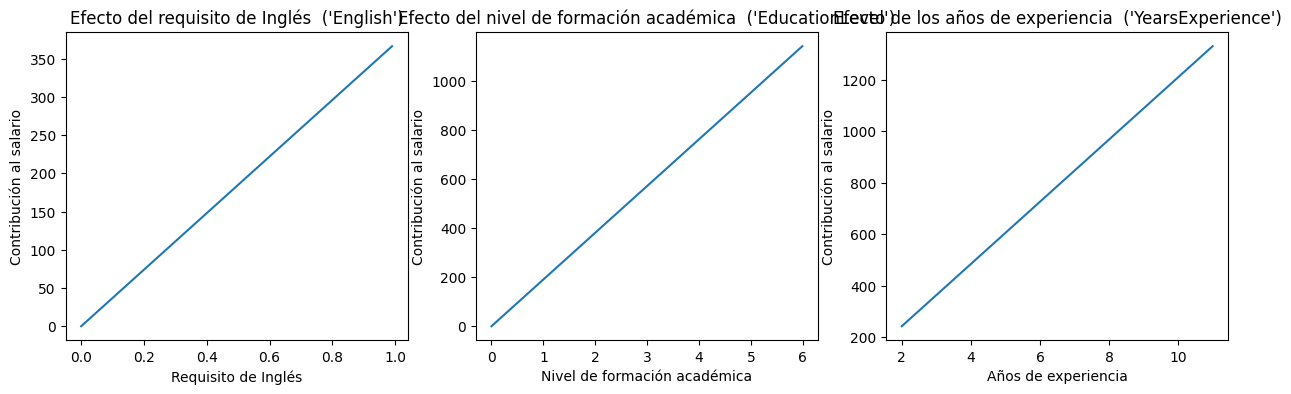

In [220]:
fig=plt.figure(figsize=(15,4))

# English
x_english = np.arange(df['English'].min(),df['English'].max(),0.01)
english_coef = multireg.params.English
y_english = english_coef*x_english
ax1=fig.add_subplot(131)
ax1.plot(x_english, y_english)
ax1.set_title("Efecto del requisito de Inglés  ('English')")
ax1.set_xlabel("Requisito de Inglés")
ax1.set_ylabel("Contribución al salario")

# EducationLevel
x_edlevel = np.arange(df['EducationLevel'].min(),df['EducationLevel'].max(),0.01)
edlevel_coef = multireg.params.EducationLevel
y_edlevel = edlevel_coef*x_edlevel
ax2=fig.add_subplot(132)
ax2.plot(x_edlevel, y_edlevel)
ax2.set_title("Efecto del nivel de formación académica  ('EducationLevel')")
ax2.set_xlabel("Nivel de formación académica")
ax2.set_ylabel("Contribución al salario")

# YearsExperience
x_yexp = np.arange(df['YearsExperience'].min(),df['YearsExperience'].max(),0.01)
yexp_coef = multireg.params.YearsExperience
y_yexp = yexp_coef*x_yexp
ax3=fig.add_subplot(133)
ax3.plot(x_yexp, y_yexp)
ax3.set_title("Efecto de los años de experiencia  ('YearsExperience')")
ax3.set_xlabel("Años de experiencia")
ax3.set_ylabel("Contribución al salario")

plt.show()

Podemos ver que en este caso, los años de experiencia son los que tienen mayor relevancia contra el aumento del salario. Además, dicha variable es la que tiene el menor error cuadrático medio, por lo que contribuye en mejor precisión a la predicción de salario. Se puede ver que hay una curva creciente siempre, entre cada variable y el salario, lo que indica que siempre que vaya a aumentar alguna de estas variables, aumentará el salario.

### Análisis con país en particular

Para el análisis de un país en particular, utilizaremos nuevamente **Bolivia**, ya que es aquel país con más datos de empleo.

In [221]:
# Construimos la matriz de variables X
columns=['English','EducationLevel','YearsExperience']
bolivia_df = df[df['Country'] == 'Bolivia']
X_bolivia_df = bolivia_df[columns]

X_bolivia = sm.add_constant(X_bolivia_df)
X_bolivia.head()

,const,English,EducationLevel,YearsExperience
710,1.0,1,3,6
711,1.0,0,2,7
712,1.0,1,1,6
713,1.0,0,4,9
714,1.0,1,4,7


In [227]:
y_bolivia = bolivia_df.SalaryUSD
y_bolivia

710    1028
711     741
712     789
713    1123
714    1219
       ... 
825     836
826    1147
827    1099
828    1051
829    1243
Name: SalaryUSD, Length: 120, dtype: int64

In [225]:
# Implementamos la regresión multilineal con los datos de Bolivia
multireg_bolivia = sm.OLS(y_bolivia, X_bolivia, hasconst=True).fit()

Observamos un resumen de la regresión con los datos de Bolivia

In [224]:
multireg_bolivia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalaryUSD   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.344e+07
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:53:24   Log-Likelihood:                -20.617
No. Observations:                 120   AIC:                             49.23
Df Residuals:                     116   BIC:                             60.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6169      0.139      4.435      0.000       0.341       0.892
English           238.8493      0.054   4444.696      0.000     238.743     238.956
EducationLevel    119.4448      0.037   3203.991      0.000     119.371     119.519
YearsExperience    71.6277      0.026   2772.511      0.000      71.577      71.679
==============================================================================
Omnibus:                       16.651   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.856
Skew:                           0.012   Prob(JB):                       0.0882
Kurtosis:                       2.015   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según vemos ahora con Bolivia, se observa que el R cuadrado es 1, lo cual es muy bueno e indica que el valor de los salarios se puede explicar en su totalidad por las variables de requisito de inglés ('English'), años de experiencia ('YearsExperience') y nivel de formación académica (EducationLevel). A diferencia del primer caso en que utilizamos todos los datos, aquí no introducimos variabilidad de otros países, la cual podría ser por otros factores que no vienen al caso, lo cual favorece la precisión de las predicciones. Esto también se condice con lo expuesto en el punto 8, en el que el análisis de correlaciones entre variables para datos de un solo país indica una mayor correlación entre estos y mayor relevancia.

Importancia relativa de las variables

In [228]:
# Error cuadratico medio de 'English'
get_rmse(y_bolivia, 'English', bolivia_df)

Error cuadrático medio (English): 628.9277655222352


In [229]:
# Error cuadratico medio de 'EducationLevel'
get_rmse(y_bolivia, 'EducationLevel', bolivia_df)

Error cuadrático medio (EducationLevel): 194.31110751415727


In [230]:
# Error cuadratico medio de 'YearsExperience'
get_rmse(y_bolivia, 'YearsExperience', bolivia_df)

Error cuadrático medio (YearsExperience): 147.51400983902573


Graficamos la importancia relativa de cada variable sobre el nivel del salario.

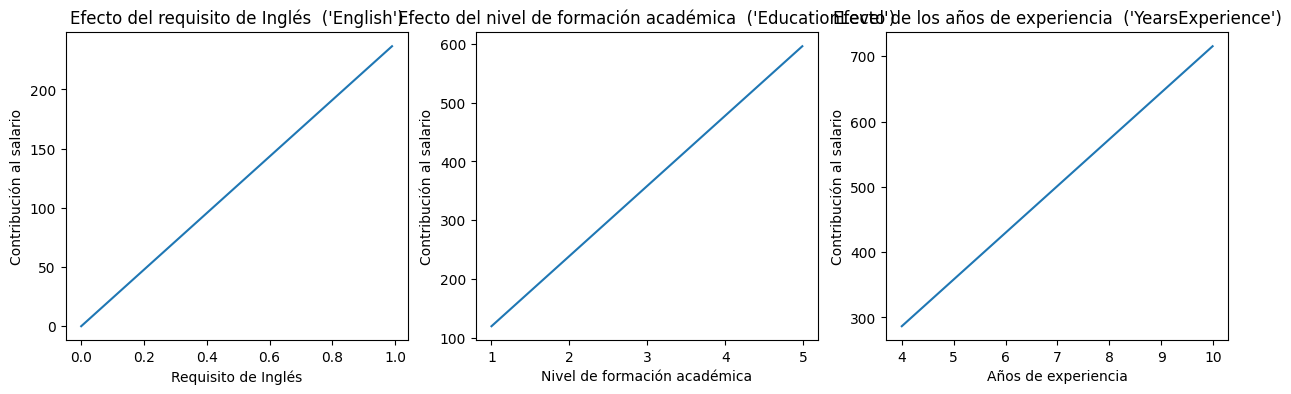

In [231]:
fig=plt.figure(figsize=(15,4))

# English
x_bolivia_english = np.arange(bolivia_df['English'].min(),bolivia_df['English'].max(),0.01)
english_bol_coef = multireg_bolivia.params.English
y_bolivia_english = english_bol_coef*x_bolivia_english
ax4=fig.add_subplot(131)
ax4.plot(x_bolivia_english, y_bolivia_english)
ax4.set_title("Efecto del requisito de Inglés  ('English')")
ax4.set_xlabel("Requisito de Inglés")
ax4.set_ylabel("Contribución al salario")

# EducationLevel
x_bolivia_edlevel = np.arange(bolivia_df['EducationLevel'].min(),bolivia_df['EducationLevel'].max(),0.01)
edlevel_bol_coef = multireg_bolivia.params.EducationLevel
y_bolivia_edlevel = edlevel_bol_coef*x_bolivia_edlevel
ax5=fig.add_subplot(132)
ax5.plot(x_bolivia_edlevel, y_bolivia_edlevel)
ax5.set_title("Efecto del nivel de formación académica  ('EducationLevel')")
ax5.set_xlabel("Nivel de formación académica")
ax5.set_ylabel("Contribución al salario")

# YearsExperience
x_bolivia_yexp = np.arange(bolivia_df['YearsExperience'].min(),bolivia_df['YearsExperience'].max(),0.01)
yexp_bol_coef = multireg_bolivia.params.YearsExperience
y_bolivia_yexp = yexp_bol_coef*x_bolivia_yexp
ax6=fig.add_subplot(133)
ax6.plot(x_bolivia_yexp, y_bolivia_yexp)
ax6.set_title("Efecto de los años de experiencia  ('YearsExperience')")
ax6.set_xlabel("Años de experiencia")
ax6.set_ylabel("Contribución al salario")

plt.show()

Al igual que antes, los años de experiencia son los que tienen mayor relevancia contra el aumento del salario. Además, dicha variable es la que tiene el menor error cuadrático medio, por lo que contribuye en mejor precisión a la predicción de salario. También vemos que hay una curva monotónica creciente entre cada variable y el salario, lo que indica que siempre que vaya a aumentar alguna de estas variables, aumentará el salario.

Por otra parte, los errores cuadráticos medios son notablemente menores que en el caso que consideramos datos de todos los países, lo que nuevamente nos confirma lo expuesto anteriormente sobre que se obtendrán mejores predicciones con un solo país en vez de utilizar datos de todos los demás. Se puede concluir entonces que la importancia de los datos a predecir radica fuertemente en que sus variables explicativas tengan relevancia semántica. Es decir, que los datos que expliquen un cierto fenómenos tienen que tener valores coherentes con el fenómeno en cuestión y es importante que no se agreguen nuevas variables que podrían incluir mayor variabilidad, por incluir en sus valores efectos externos, por ejemplo, la situación económica de un país al predecir el pib de otro.